# MLG382 
- ## Project 2 
- Group M

In [1]:

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


warnings.simplefilter('ignore', category=Warning, lineno=0, append=False)

## Problem

A small to medium enterprise wants to improve their marketing strategy by tailoring it to different groups of customers according to their behaviour, hoping to increase sales. They want to know which customers they should offer incentitives, to encourage them to make more purchases and spend more money. They also want to know which customers are loyal and big spenders in order to offer them rewards for supporting the business.

## Approach

According to the business needs a customer segmentation based on behaviour is needed. A Regency Frequency Monetary (RFM) analysis is a good reflection of customer behaviour. Once a RFM analysis is done, customers can be segmented into groups by use of k-means clustering. Behaviour of these groups can be determined by looking at the mean of each group and a different marketing strategy can then be recommneded for a specific customer based on which group they fall under.


## Data

The business provides a data set containing the following information about their sales: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country. For a behavioural customer segmentation the geographical location is irrellevant. For the RFM data analysis we only need the InvoiceNo, Quantity, InvoiceDate, UnitPrice and Customer ID.


In [2]:
initial_df = pd.read_excel('..\data\Online_Retail.csv')

## Initial Data Analysis

In [3]:
initial_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


From looking at the data headings feature engineering needs to be done to make a new column of the amount spent by multiplying the quantity with the unit price as well as grouping by invoice no and then by customer ID. Location Stock Code and Country is not necessary and can be dropped.

In [4]:
print(initial_df.info())
initial_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

From inspecting the data it can be seen that there are some missing values that needs to be dealt with as well as data types that needs to be changed.

In [5]:
unique_count_CustomerID = initial_df['CustomerID'].nunique()
print(unique_count_CustomerID)

4372


We can see there are 4372 customers that need to be grouped.

## RFM Data Analysis

In [6]:
rfm_df = pd.read_csv('..\data\\rfm_ds_final.csv')

print(rfm_df.head())
print(rfm_df.info())

   CustomerID   Amount  Frequency  Recency  labels
0     12348.0  1797.24         31       74       2
1     12349.0  1757.55         73       18       1
2     12350.0   334.40         17      309       0
3     12352.0  2506.04         85       35       1
4     12353.0    89.00          4      203       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3582 non-null   float64
 1   Amount      3582 non-null   float64
 2   Frequency   3582 non-null   int64  
 3   Recency     3582 non-null   int64  
 4   labels      3582 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 140.1 KB
None


### Data Visualisation

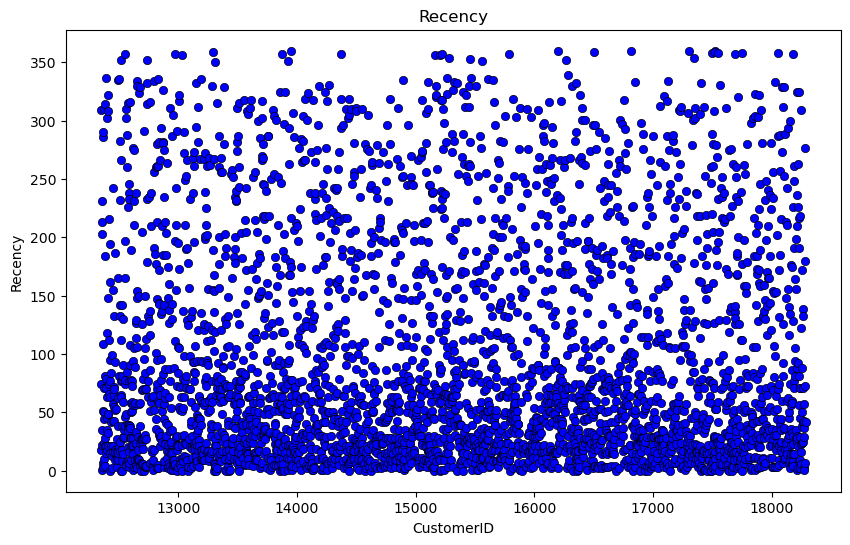

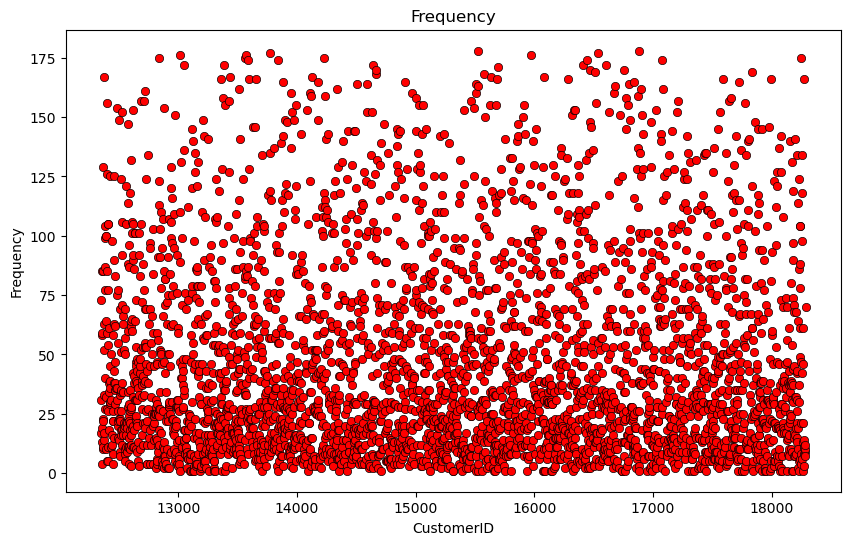

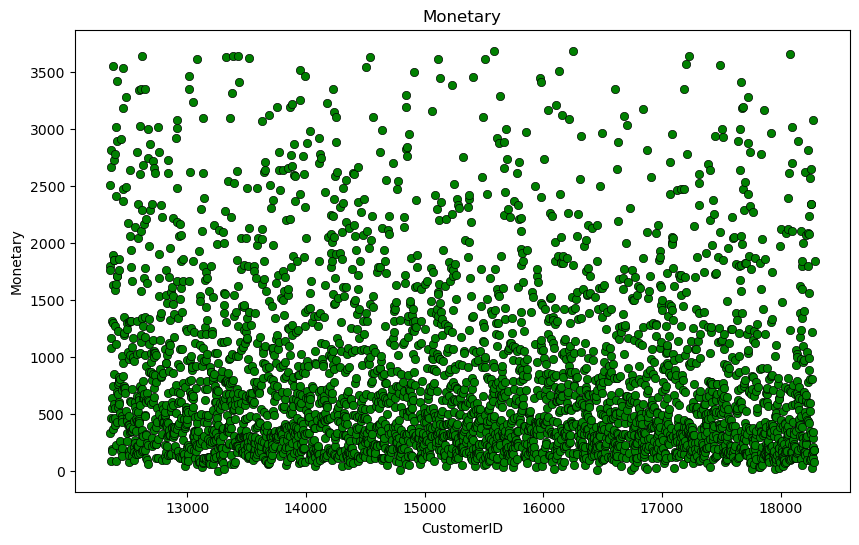

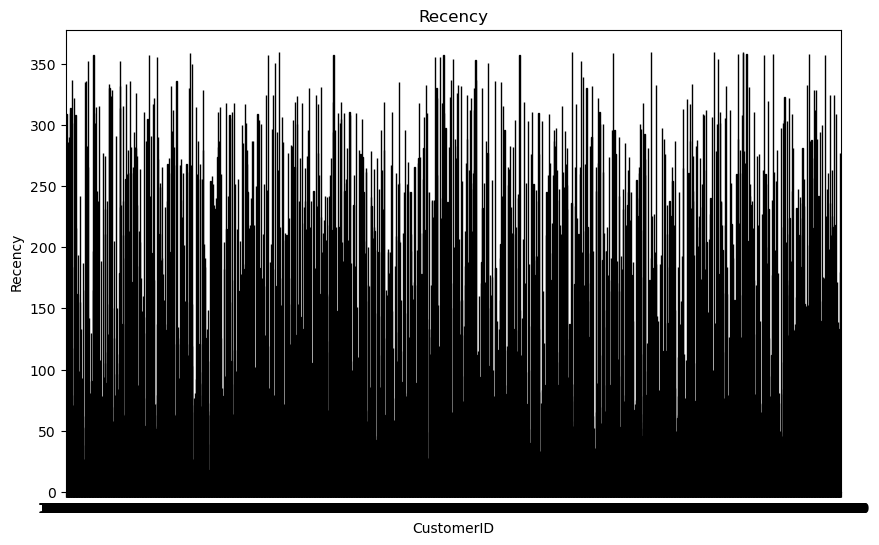

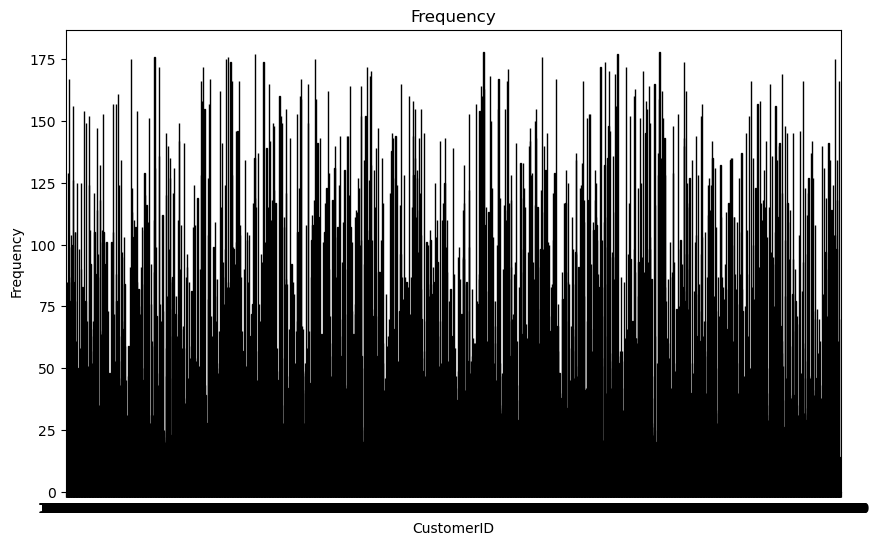

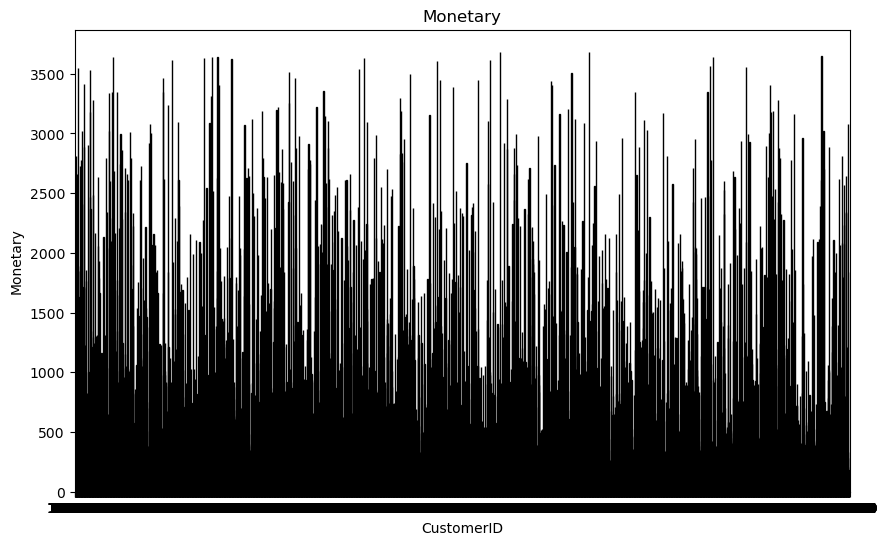

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='CustomerID', y='Recency', color='blue', edgecolor='k')
plt.title('Recency')
plt.xlabel('CustomerID')
plt.ylabel('Recency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='CustomerID', y='Frequency', color='red', edgecolor='k')
plt.title('Frequency')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='CustomerID', y='Amount', color='green', edgecolor='k')
plt.title('Monetary')
plt.xlabel('CustomerID')
plt.ylabel('Monetary')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=rfm_df, x='CustomerID', y='Recency', color='blue', edgecolor='k')
plt.title('Recency')
plt.xlabel('CustomerID')
plt.ylabel('Recency')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=rfm_df, x='CustomerID', y='Frequency', color='red', edgecolor='k')
plt.title('Frequency')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=rfm_df, x='CustomerID', y='Amount', color='green', edgecolor='k')
plt.title('Monetary')
plt.xlabel('CustomerID')
plt.ylabel('Monetary')
plt.show()


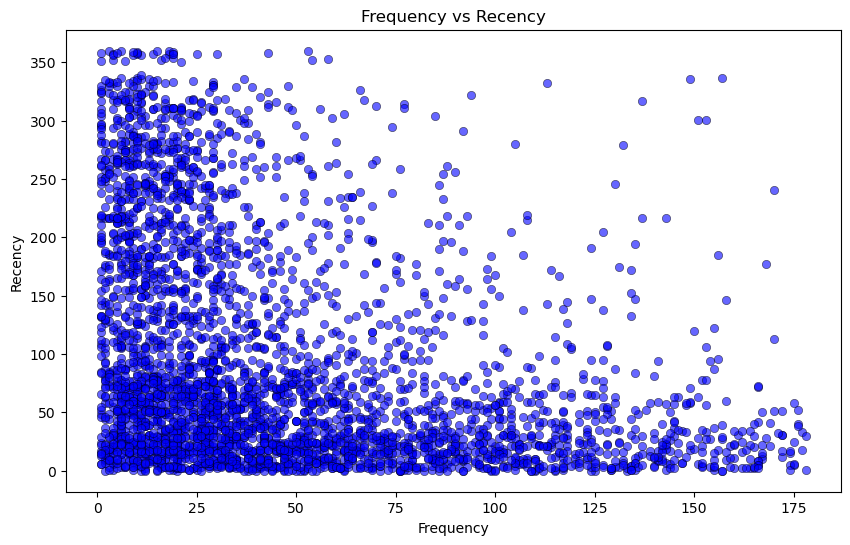

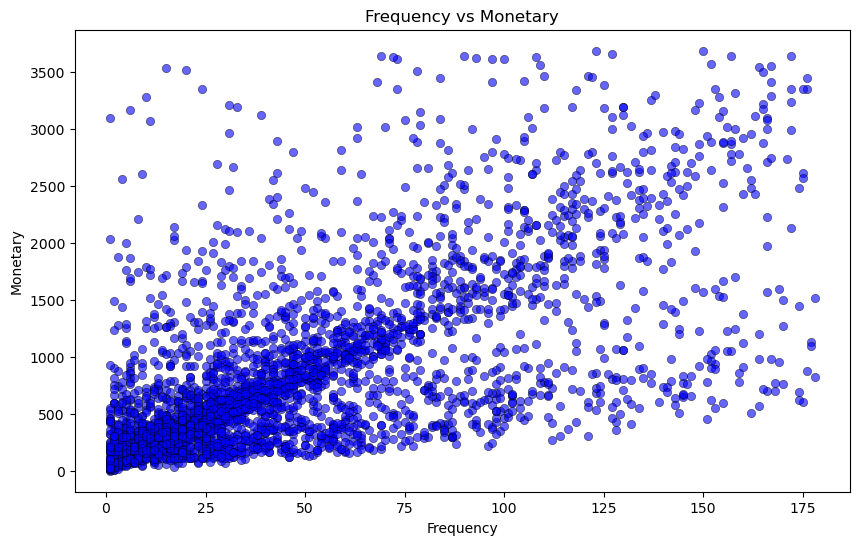

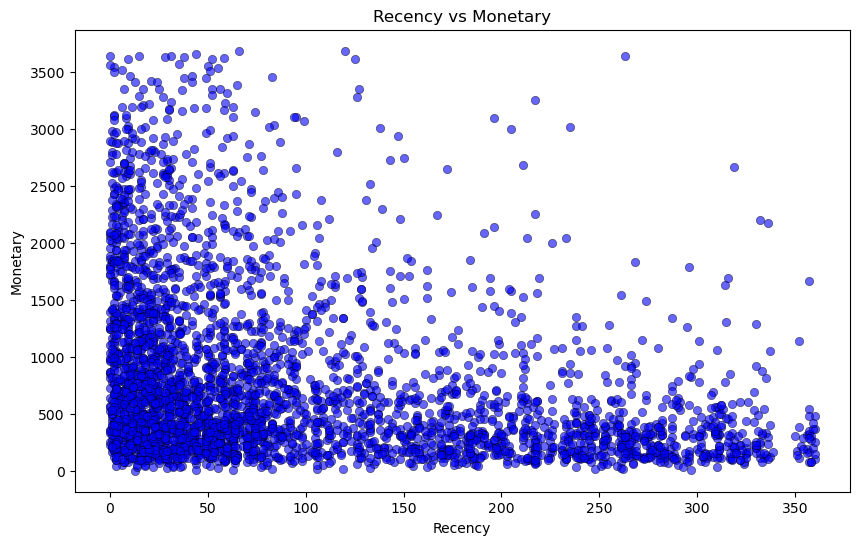

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Frequency', y='Recency', sizes=(50, 500), alpha=0.6, edgecolor='k', color='blue')


plt.title('Frequency vs Recency')
plt.xlabel('Frequency')
plt.ylabel('Recency')



plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Frequency', y='Amount', sizes=(50, 500), alpha=0.6, edgecolor='k', color='blue')


plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')


plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Amount', sizes=(50, 500), alpha=0.6, edgecolor='k', color='blue')

plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.show()

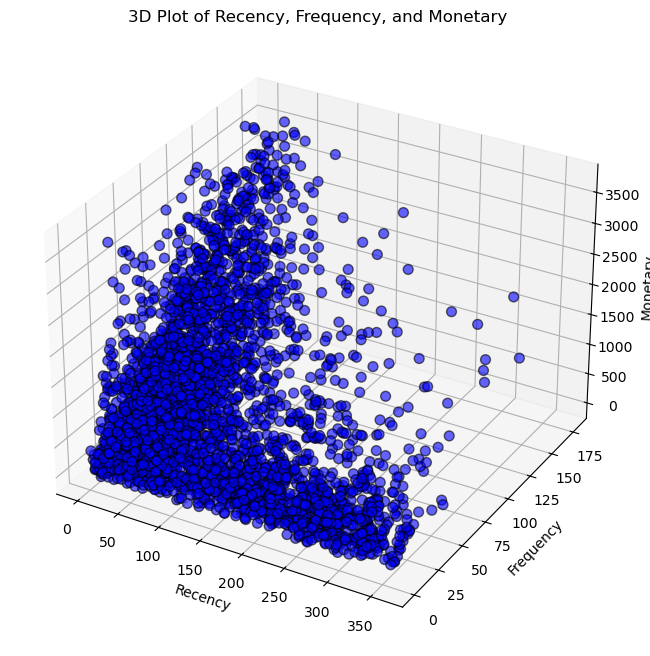

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  


scatter = ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Amount'], 
                     c='blue', alpha=0.6, edgecolor='k', s=50)


ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


ax.set_title('3D Plot of Recency, Frequency, and Monetary')


plt.show()